In [1]:
import scipy.io
import keras
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import random 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

%matplotlib inline 



/Users/liginsolamen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df=pd.read_msgpack('/Users/liginsolamen/MRE/MREData/mre/MREdata_072118.msg')


In [4]:
Ur=np.stack(df.Ur.values,axis=3).transpose(3,0,1,2).reshape(612,-1)
Ui=np.stack(df.Ui.values,axis=3).transpose(3,0,1,2).reshape(612,-1)

X=np.sqrt(Ui**2+Ur**2)
Y=np.stack(df.RS.values,axis=2).transpose(2,0,1).reshape(612,-1)

print(X.shape)
print(Y.shape)

(612, 12288)
(612, 4096)


In [5]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3)
train_X,valid_X,train_Y,valid_Y=train_test_split(train_X,train_Y,test_size=0.3)

In [35]:
X.shape

(612, 12288)

In [6]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(X.shape[1],)))
#32= # of units

#adding a second layer
model.add(Dense(100,activation='relu'))

#adding a third layer
model.add(Dense(100,activation='relu'))

#Final Layer: needs to be the same size as your desired output
model.add(Dense(Y.shape[1],activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                393248    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              413696    
Total params: 820,344
Trainable params: 820,344
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mean_squared_error',
             optimizer='adam')

In [8]:
model.fit(train_X,train_Y,epochs=100,batch_size=1,
          validation_data=(valid_X,valid_Y))

Train on 299 samples, validate on 129 samples
Epoch 1/100
299/299 [==============================] - 5s 17ms/step - loss: 4160045.7983 - val_loss: 3746493.5916
Epoch 2/100
299/299 [==============================] - 5s 16ms/step - loss: 3420585.1963 - val_loss: 3643201.3341
Epoch 3/100
299/299 [==============================] - 5s 16ms/step - loss: 3199920.6900 - val_loss: 3387523.1754
Epoch 4/100
299/299 [==============================] - 5s 16ms/step - loss: 2915379.4296 - val_loss: 3016391.6875
Epoch 5/100
299/299 [==============================] - 5s 17ms/step - loss: 2509513.4161 - val_loss: 2541841.9215
Epoch 6/100
299/299 [==============================] - 5s 16ms/step - loss: 2115790.6488 - val_loss: 2256026.7025
Epoch 7/100
299/299 

In [9]:
y_predict=model.predict(test_X).reshape(test_X.shape[0],64,64)
ytest=test_Y.reshape(test_Y.shape[0],64,64)

In [10]:
y_predict.shape


(184, 64, 64)

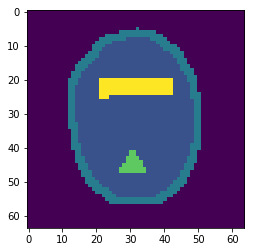

In [15]:
plt.imshow(ytest[12])

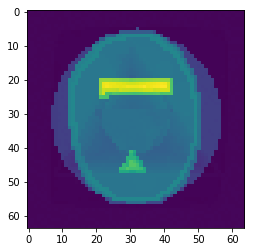

In [16]:
plt.imshow(y_predict[12])

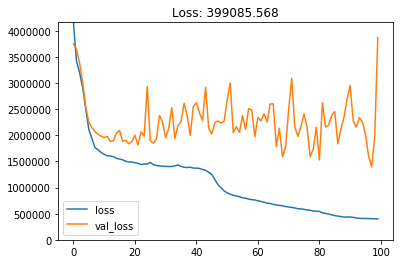

In [14]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
ANNhistory=Out[8]
plot_loss(ANNhistory)